<a href="https://colab.research.google.com/github/jason96819/Classification-of-soccer-player-types/blob/main/Data%20collection%2C%20refining%2C%20and%20preprocessing/7_%EC%84%A0%EC%88%98%EC%97%AD%ED%95%A0_%EA%B5%B0%EC%A7%91%ED%99%94_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
GK = pd.read_csv('GK.csv')
DF = pd.read_csv('DF.csv')
MF = pd.read_csv('MF.csv')
FW = pd.read_csv('FW.csv')

In [ ]:
GK['Position'] = 'GK'
DF['Position'] = 'DF'
MF['Position'] = 'MF'
FW['Position'] = 'FW'

In [ ]:
role = pd.concat([GK, DF, MF, FW])
role = role.sort_values(by='Unnamed: 0')
role = role[['Position', 'Role', 'Detailed Role']].reset_index(drop=True)
role

,Position,Role,Detailed Role
0,FW,WF,Outlet
1,MF,CDM,Builder
2,FW,WF,Unlocker
3,MF,CDM,Builder
4,MF,CAM,Box Crasher
...,...,...,...
1696,DF,FB,Progressor
1697,FW,WF,Unlocker
1698,DF,CB,SCB
1699,DF,FB,Progressor


In [ ]:
df = pd.read_csv('1_전체데이터_1701_74.csv', encoding='cp949')
df = df.drop(columns=['Column1'])
df

,년도,클럽명,선수명,출전시간,득점,도움,슈팅,유효 슈팅,차단된슈팅,벗어난슈팅,...,클리어링,인터셉트,차단,획득,블락,볼미스,파울,피파울,경고,퇴장
0,2022,강원,갈레고,386,3,0,11,5,2,4,...,3,6,6,24,8,4,11,10,2,0
1,2022,강원,김대우,541,1,0,6,1,1,4,...,9,14,14,39,15,10,11,10,1,0
2,2022,강원,김대원,3287,12,13,64,21,15,28,...,22,35,29,200,45,35,23,20,0,0
3,2022,강원,김동현,2941,0,1,21,4,2,15,...,116,100,74,215,96,9,38,34,3,0
4,2022,강원,코바야시,694,0,1,9,1,2,6,...,10,22,14,74,18,5,11,17,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2020,포항,김용환,285,0,1,0,0,0,0,...,5,3,12,27,2,0,2,3,0,0
1697,2020,포항,팔라시오스,1671,5,6,27,11,6,10,...,6,29,30,106,0,19,29,20,5,1
1698,2020,포항,하창래,2456,1,0,11,4,0,7,...,72,53,134,221,15,3,42,18,8,0
1699,2020,포항,박재우98,624,0,0,1,0,1,0,...,4,7,19,41,0,3,15,8,2,0


In [ ]:
result = pd.concat([df, role], axis=1)
result

,년도,클럽명,선수명,출전시간,득점,도움,슈팅,유효 슈팅,차단된슈팅,벗어난슈팅,...,획득,블락,볼미스,파울,피파울,경고,퇴장,Position,Role,Detailed Role
0,2022,강원,갈레고,386,3,0,11,5,2,4,...,24,8,4,11,10,2,0,FW,WF,Outlet
1,2022,강원,김대우,541,1,0,6,1,1,4,...,39,15,10,11,10,1,0,MF,CDM,Builder
2,2022,강원,김대원,3287,12,13,64,21,15,28,...,200,45,35,23,20,0,0,FW,WF,Unlocker
3,2022,강원,김동현,2941,0,1,21,4,2,15,...,215,96,9,38,34,3,0,MF,CDM,Builder
4,2022,강원,코바야시,694,0,1,9,1,2,6,...,74,18,5,11,17,2,0,MF,CAM,Box Crasher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2020,포항,김용환,285,0,1,0,0,0,0,...,27,2,0,2,3,0,0,DF,FB,Progressor
1697,2020,포항,팔라시오스,1671,5,6,27,11,6,10,...,106,0,19,29,20,5,1,FW,WF,Unlocker
1698,2020,포항,하창래,2456,1,0,11,4,0,7,...,221,15,3,42,18,8,0,DF,CB,SCB
1699,2020,포항,박재우98,624,0,0,1,0,1,0,...,41,0,3,15,8,2,0,DF,FB,Progressor


In [ ]:
result['롱패스'] = result['롱패스 시도'] + result['중거리패스 시도']

In [ ]:
result = result[['년도', '클럽명', '선수명', '출전시간', '득점', '도움', '슈팅', '스로인', '드리블 시도', '키패스',
                        '전방 패스 시도', '횡패스 시도', '공격지역패스 시도', '수비지역패스 시도', '중앙지역패스 시도',
                        '롱패스', '숏패스 시도', '크로스 시도', '경합 지상 시도', '경합 공중 시도',
                        '태클 시도', '클리어링', '인터셉트', '차단', '블락', '파울', '피파울', 'Position', 'Role', 'Detailed Role']]

In [ ]:
result

,년도,클럽명,선수명,출전시간,득점,도움,슈팅,스로인,드리블 시도,키패스,...,태클 시도,클리어링,인터셉트,차단,블락,파울,피파울,Position,Role,Detailed Role
0,2022,강원,갈레고,386,3,0,11,3,16,1,...,10,3,6,6,8,11,10,FW,WF,Outlet
1,2022,강원,김대우,541,1,0,6,0,3,4,...,13,9,14,14,15,11,10,MF,CDM,Builder
2,2022,강원,김대원,3287,12,13,64,5,46,78,...,83,22,35,29,45,23,20,FW,WF,Unlocker
3,2022,강원,김동현,2941,0,1,21,0,7,9,...,73,116,100,74,96,38,34,MF,CDM,Builder
4,2022,강원,코바야시,694,0,1,9,1,5,4,...,19,10,22,14,18,11,17,MF,CAM,Box Crasher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2020,포항,김용환,285,0,1,0,16,2,4,...,1,5,3,12,2,2,3,DF,FB,Progressor
1697,2020,포항,팔라시오스,1671,5,6,27,0,35,30,...,13,6,29,30,0,29,20,FW,WF,Unlocker
1698,2020,포항,하창래,2456,1,0,11,2,1,4,...,22,72,53,134,15,42,18,DF,CB,SCB
1699,2020,포항,박재우98,624,0,0,1,46,3,0,...,2,4,7,19,0,15,8,DF,FB,Progressor


In [ ]:
result.to_csv('22_21_20_player_role.csv')

In [ ]:
result = pd.read_csv('22_21_20_player_role.csv')
result

,Unnamed: 0,년도,클럽명,선수명,출전시간,득점,도움,슈팅,스로인,드리블 시도,...,태클 시도,클리어링,인터셉트,차단,블락,파울,피파울,Position,Role,Detailed Role
0,0,2022,강원,갈레고,386,3,0,11,3,16,...,10,3,6,6,8,11,10,FW,WF,Outlet
1,1,2022,강원,김대우,541,1,0,6,0,3,...,13,9,14,14,15,11,10,MF,CDM,Builder
2,2,2022,강원,김대원,3287,12,13,64,5,46,...,83,22,35,29,45,23,20,FW,WF,Unlocker
3,3,2022,강원,김동현,2941,0,1,21,0,7,...,73,116,100,74,96,38,34,MF,CDM,Builder
4,4,2022,강원,코바야시,694,0,1,9,1,5,...,19,10,22,14,18,11,17,MF,CAM,Box Crasher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1696,2020,포항,김용환,285,0,1,0,16,2,...,1,5,3,12,2,2,3,DF,FB,Progressor
1697,1697,2020,포항,팔라시오스,1671,5,6,27,0,35,...,13,6,29,30,0,29,20,FW,WF,Unlocker
1698,1698,2020,포항,하창래,2456,1,0,11,2,1,...,22,72,53,134,15,42,18,DF,CB,SCB
1699,1699,2020,포항,박재우98,624,0,0,1,46,3,...,2,4,7,19,0,15,8,DF,FB,Progressor


In [ ]:
result['Detailed Role'].value_counts()

SCB                  190
Progressor           152
Spreader             126
Roamer               114
Box Crasher          113
Safety               106
Creator              102
Unlocker              97
Goalkeeper            91
Wide Threat           89
Target                81
Box to Box            75
Builder               70
Finisher              68
Outlet                62
Distributor           58
Overlapper            46
Swiper goalkeeper     46
Aggressor             15
Name: Detailed Role, dtype: int64

In [ ]:
print((result['Position']=='GK').sum())
print((result['Position']=='DF').sum())
print((result['Position']=='MF').sum())
print((result['Position']=='FW').sum())

137
635
418
511


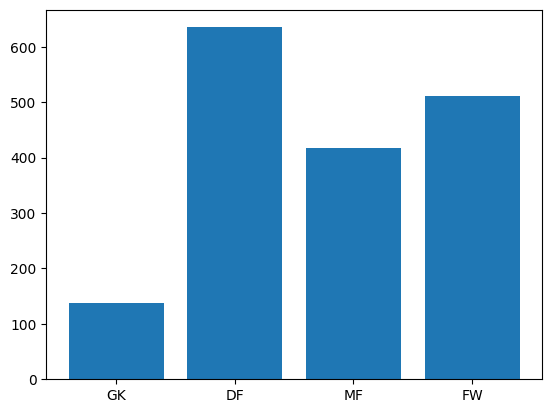

In [ ]:
import matplotlib.pyplot as plt

# 각 포지션별 선수 수
GK = (result['Position']=='GK').sum()
DF = (result['Position']=='DF').sum()
MF = (result['Position']=='MF').sum()
FW = (result['Position']=='FW').sum()

# 막대 그래프 그리기
plt.bar(['GK', 'DF', 'MF', 'FW'], [GK, DF, MF, FW])
plt.show()

<ipython-input-11-f6b6558e5753>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


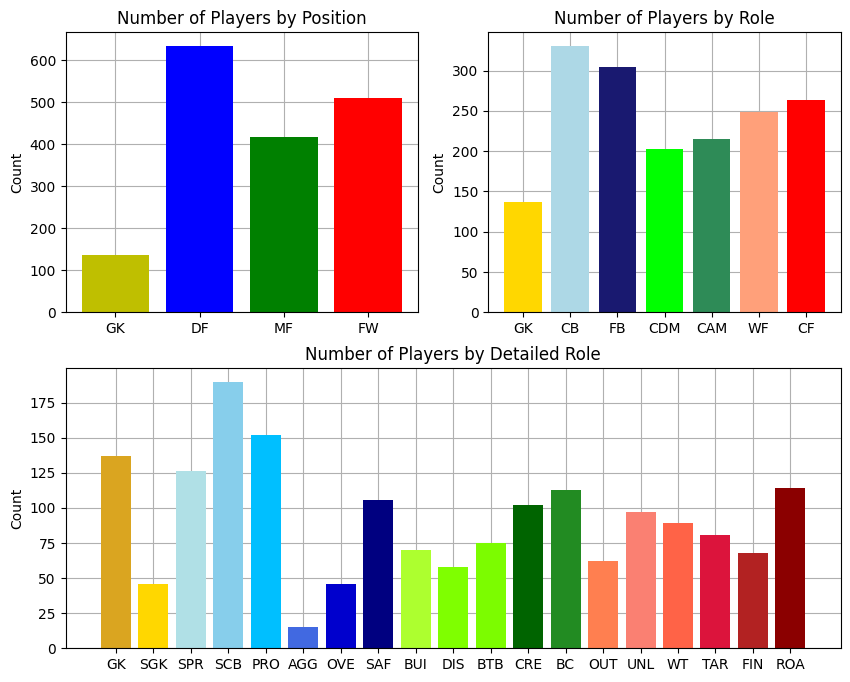

In [ ]:
import matplotlib.pyplot as plt

# 그래프의 크기를 설정합니다.
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 2x2 그래프 레이아웃을 만들고, 첫 번째 subplot을 선택합니다.
plt.subplot(2, 2, 1)

# 첫 번째 subplot에 그래프를 그립니다.
GK = (result['Position'] == 'GK').sum()
DF = (result['Position'] == 'DF').sum()
MF = (result['Position'] == 'MF').sum()
FW = (result['Position'] == 'FW').sum()

# 막대그래프를 그립니다.
positions = ['GK', 'DF', 'MF', 'FW']
counts = [GK, DF, MF, FW]
plt.bar(positions, counts, color=['y', 'b', 'g', 'r'])

# 그래프의 제목과 y축 레이블을 설정합니다.
plt.title('Number of Players by Position')
plt.ylabel('Count')
plt.rc('axes', axisbelow=True)
plt.grid()

# 두 번째 subplot을 선택합니다.
plt.subplot(2, 2, 2)

# 두 번째 subplot에 그래프를 그립니다.
GK = (result['Role'] == 'GK').sum()
CB = (result['Role'] == 'CB').sum()
FB = (result['Role'] == 'FB').sum()
CDM = (result['Role'] == 'CDM').sum()
CAM = (result['Role'] == 'CAM').sum()
WF = (result['Role'] == 'WF').sum()
CF = (result['Role'] == 'CF').sum()

# 막대그래프를 그립니다.
positions = ['GK', 'CB', 'FB', 'CDM', 'CAM', 'WF', 'CF']
counts = [GK, CB, FB, CDM, CAM, WF, CF]
plt.bar(positions, counts, color=['gold', 'lightblue', 'midnightblue', 'lime', 'seagreen', 'lightsalmon', 'red'])

# 그래프의 제목과 y축 레이블을 설정합니다.
plt.title('Number of Players by Role')
plt.ylabel('Count')
plt.grid()

# 세 번째 subplot을 선택합니다.
plt.subplot(2, 1, 2)

# 세 번째 subplot에 그래프를 그립니다.
GGK = (result['Detailed Role'] == 'Goalkeeper').sum()
SGK = (result['Detailed Role'] == 'Swiper goalkeeper').sum()
SPR = (result['Detailed Role'] == 'Spreader').sum()
SCB = (result['Detailed Role'] == 'SCB').sum()
PRO = (result['Detailed Role'] == 'Progressor').sum()
AGG = (result['Detailed Role'] == 'Aggressor').sum()
OVE = (result['Detailed Role'] == 'Overlapper').sum()
SAF = (result['Detailed Role'] == 'Safety').sum()
BUI = (result['Detailed Role'] == 'Builder').sum()
DIS = (result['Detailed Role'] == 'Distributor').sum()
BTB = (result['Detailed Role'] == 'Box to Box').sum()
CRE = (result['Detailed Role'] == 'Creator').sum()
BC = (result['Detailed Role'] == 'Box Crasher').sum()
OUT = (result['Detailed Role'] == 'Outlet').sum()
UNL = (result['Detailed Role'] == 'Unlocker').sum()
WT = (result['Detailed Role'] == 'Wide Threat').sum()
TAR = (result['Detailed Role'] == 'Target').sum()
FIN = (result['Detailed Role'] == 'Finisher').sum()
ROA = (result['Detailed Role'] == 'Roamer').sum()

# 막대그래프를 그립니다.
positions = ['GK', 'SGK', 'SPR', 'SCB', 'PRO', 'AGG', 'OVE', 'SAF', 'BUI', 'DIS', 'BTB', 'CRE', 'BC', 'OUT', 'UNL', 'WT', 'TAR', 'FIN', 'ROA']
counts = [GK, SGK, SPR, SCB, PRO, AGG, OVE, SAF, BUI, DIS, BTB, CRE, BC, OUT, UNL, WT, TAR, FIN, ROA]
plt.bar(positions, counts, color=['goldenrod', 'gold', 'powderblue', 'skyblue', 'deepskyblue', 'royalblue', 'mediumblue', 'navy', 'greenyellow', 'chartreuse', 'lawngreen', 'darkgreen', 'forestgreen', 'coral', 'salmon', 'tomato', 'crimson', 'firebrick', 'darkred'])

# 그래프의 제목과 y축 레이블을 설정합니다.
plt.title('Number of Players by Detailed Role')
plt.ylabel('Count')

# 그래프를 출력합니다.
plt.grid()
plt.show()

# 몰라 시발

In [ ]:
result0 = result.drop(columns=['년도', '클럽명', '선수명', 'Position', 'Role', 'Detailed Role'])
result0.columns = ['Goal', 'Ass', 'Shoot', 'Throw', 'Dribble', 'KPass', 'FP', 'CP',
                              'AP', 'DP', 'MP', 'LP', 'SP', 'Cross', 'RG', 'RS', 'Takkle', 'Clearing',
                              'Intercept', 'Cut', 'Block', 'Foul', 'Fouled']
result0

,Time,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,CP,AP,...,Cross,RG,RS,Takkle,Clearing,Intercept,Cut,Block,Foul,Fouled
0,386,3,0,11,3,16,1,24,48,46,...,4,12,12,10,3,6,6,8,11,10
1,541,1,0,6,0,3,4,69,44,42,...,3,20,17,13,9,14,14,15,11,10
2,3287,12,13,64,5,46,78,293,432,510,...,291,84,41,83,22,35,29,45,23,20
3,2941,0,1,21,0,7,9,392,585,188,...,8,65,99,73,116,100,74,96,38,34
4,694,0,1,9,1,5,4,166,132,90,...,2,15,18,19,10,22,14,18,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,285,0,1,0,16,2,4,104,70,47,...,13,7,4,1,5,3,12,2,2,3
1697,1671,5,6,27,0,35,30,146,264,300,...,88,118,76,13,6,29,30,0,29,20
1698,2456,1,0,11,2,1,4,581,532,19,...,4,46,121,22,72,53,134,15,42,18
1699,624,0,0,1,46,3,0,161,90,74,...,21,12,7,2,4,7,19,0,15,8


In [ ]:
for i in range(len(result0)):
    x = result0.Time[i] / 60
    result0.iloc[i, :] /= x
result0 = result0.drop(columns=['Time'])
result0

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,CP,AP,DP,...,Cross,RG,RS,Takkle,Clearing,Intercept,Cut,Block,Foul,Fouled
0,0.466321,0.000000,1.709845,0.466321,2.487047,0.155440,3.730570,7.461140,7.150259,1.398964,...,0.621762,1.865285,1.865285,1.554404,0.466321,0.932642,0.932642,1.243523,1.709845,1.554404
1,0.110906,0.000000,0.665434,0.000000,0.332717,0.443623,7.652495,4.879852,4.658041,3.105360,...,0.332717,2.218115,1.885397,1.441774,0.998152,1.552680,1.552680,1.663586,1.219963,1.109057
2,0.219045,0.237298,1.168239,0.091269,0.839671,1.423791,5.348342,7.885610,9.309401,2.044417,...,5.311834,1.533313,0.748403,1.515059,0.401582,0.638880,0.529358,0.821418,0.419836,0.365075
3,0.000000,0.020401,0.428426,0.000000,0.142809,0.183611,7.997280,11.934716,3.835430,3.855831,...,0.163210,1.326080,2.019721,1.489289,2.366542,2.040122,1.509691,1.958518,0.775247,0.693642
4,0.000000,0.086455,0.778098,0.086455,0.432277,0.345821,14.351585,11.412104,7.780980,3.631124,...,0.172911,1.296830,1.556196,1.642651,0.864553,1.902017,1.210375,1.556196,0.951009,1.469741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,0.000000,0.210526,0.000000,3.368421,0.421053,0.842105,21.894737,14.736842,9.894737,8.210526,...,2.736842,1.473684,0.842105,0.210526,1.052632,0.631579,2.526316,0.421053,0.421053,0.631579
1697,0.179533,0.215440,0.969479,0.000000,1.256732,1.077199,5.242370,9.479354,10.771993,0.897666,...,3.159785,4.236984,2.728905,0.466786,0.215440,1.041293,1.077199,0.000000,1.041293,0.718133
1698,0.024430,0.000000,0.268730,0.048860,0.024430,0.097720,14.193811,12.996743,0.464169,13.387622,...,0.097720,1.123779,2.956026,0.537459,1.758958,1.294788,3.273616,0.366450,1.026059,0.439739
1699,0.000000,0.000000,0.096154,4.423077,0.288462,0.000000,15.480769,8.653846,7.115385,6.153846,...,2.019231,1.153846,0.673077,0.192308,0.384615,0.673077,1.826923,0.000000,1.442308,0.769231


In [ ]:
from sklearn.preprocessing import StandardScaler

result0_scaled = StandardScaler().fit_transform(result0)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(result0_scaled)
result0_pca = pca.transform(result0_scaled)
result0_pca.shape

(1701, 2)

In [ ]:
pca_columns=['pca1', 'pca2']
result0df = pd.DataFrame(result0_pca, columns=pca_columns)
result0df['target'] = result['Detailed Role']
result0df

,pca1,pca2,target
0,-4.452488,-0.888666,Outlet
1,-0.641232,-0.615604,Builder
2,-3.925198,1.020945,Unlocker
3,1.731151,0.127289,Builder
4,0.261973,1.843589,Box Crasher
...,...,...,...
1696,0.925898,3.773228,Progressor
1697,-4.302551,0.920883,Unlocker
1698,2.719847,-0.412393,SCB
1699,0.698634,1.049466,Progressor


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# target 컬럼 라벨인코딩
result0df['target_encoded'] = encoder.fit_transform(result0df['target'])
result0df

,pca1,pca2,target,target_encoded
0,-4.452488,-0.888666,Outlet,8
1,-0.641232,-0.615604,Builder,3
2,-3.925198,1.020945,Unlocker,17
3,1.731151,0.127289,Builder,3
4,0.261973,1.843589,Box Crasher,1
...,...,...,...,...
1696,0.925898,3.773228,Progressor,10
1697,-4.302551,0.920883,Unlocker,17
1698,2.719847,-0.412393,SCB,12
1699,0.698634,1.049466,Progressor,10


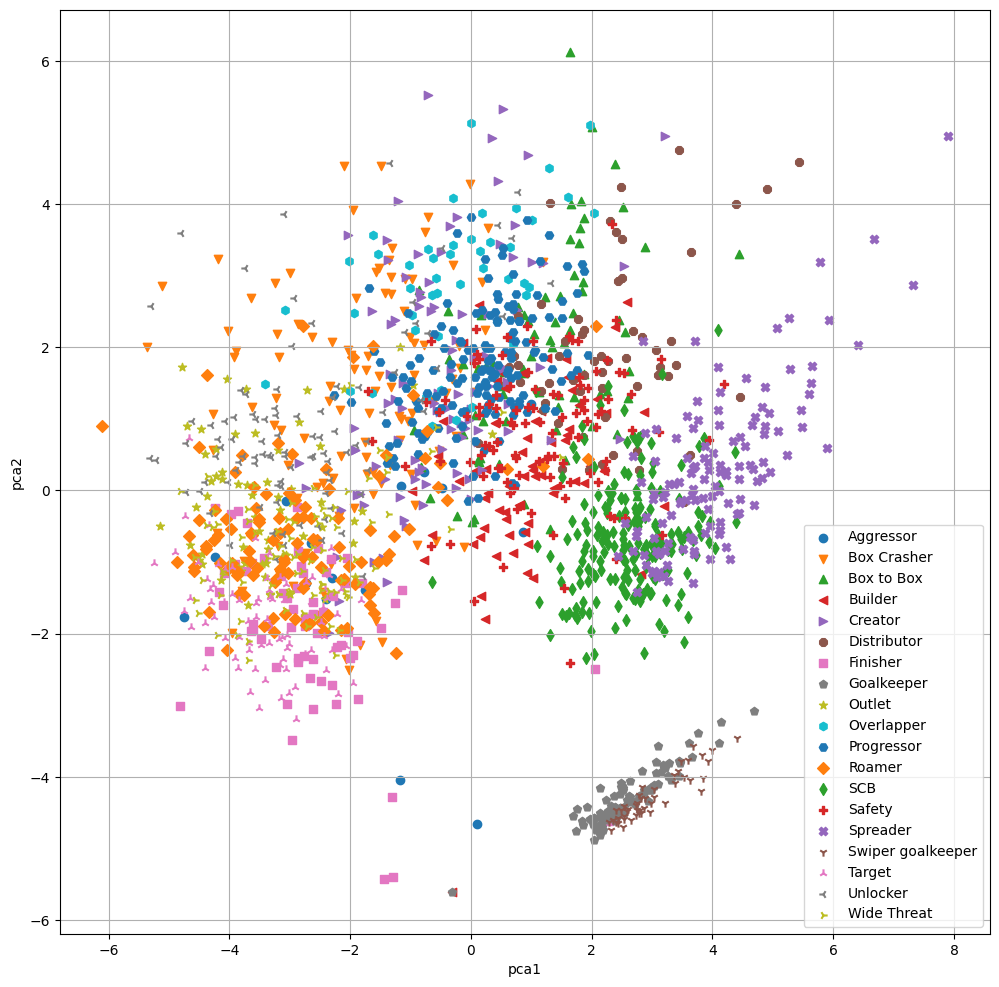

In [ ]:
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', '1', '2', '3', '4']

plt.figure(figsize=(12, 12))

for i, marker in enumerate(markers):
    x_axis_data = result0df[result0df['target_encoded']==i]['pca1']
    y_axis_data = result0df[result0df['target_encoded']==i]['pca2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=result0df['target'][result0df['target_encoded']==i].iloc[0])

plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.grid()
plt.show()

In [ ]:
result0df['Position'] = result['Position']
result1df = result0df[result0df['Position']=='GK']
result1df

,pca1,pca2,target,target_encoded,Position
14,2.716237,-4.376338,Goalkeeper,7,GK
27,3.066808,-3.952164,Goalkeeper,7,GK
47,3.458823,-3.809203,Goalkeeper,7,GK
55,2.738369,-4.335262,Goalkeeper,7,GK
71,3.095343,-3.573148,Goalkeeper,7,GK
...,...,...,...,...,...
1627,1.831595,-4.616680,Goalkeeper,7,GK
1645,2.365276,-4.540050,Swiper goalkeeper,15,GK
1660,2.136183,-4.819148,Goalkeeper,7,GK
1676,2.079008,-4.748980,Goalkeeper,7,GK


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# target 컬럼 라벨인코딩
result1df['target_encoded'] = encoder.fit_transform(result1df['target'])
result1df

<ipython-input-111-8036c8a44e18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1df['target_encoded'] = encoder.fit_transform(result1df['target'])


,pca1,pca2,target,target_encoded,Position
14,2.716237,-4.376338,Goalkeeper,0,GK
27,3.066808,-3.952164,Goalkeeper,0,GK
47,3.458823,-3.809203,Goalkeeper,0,GK
55,2.738369,-4.335262,Goalkeeper,0,GK
71,3.095343,-3.573148,Goalkeeper,0,GK
...,...,...,...,...,...
1627,1.831595,-4.616680,Goalkeeper,0,GK
1645,2.365276,-4.540050,Swiper goalkeeper,1,GK
1660,2.136183,-4.819148,Goalkeeper,0,GK
1676,2.079008,-4.748980,Goalkeeper,0,GK


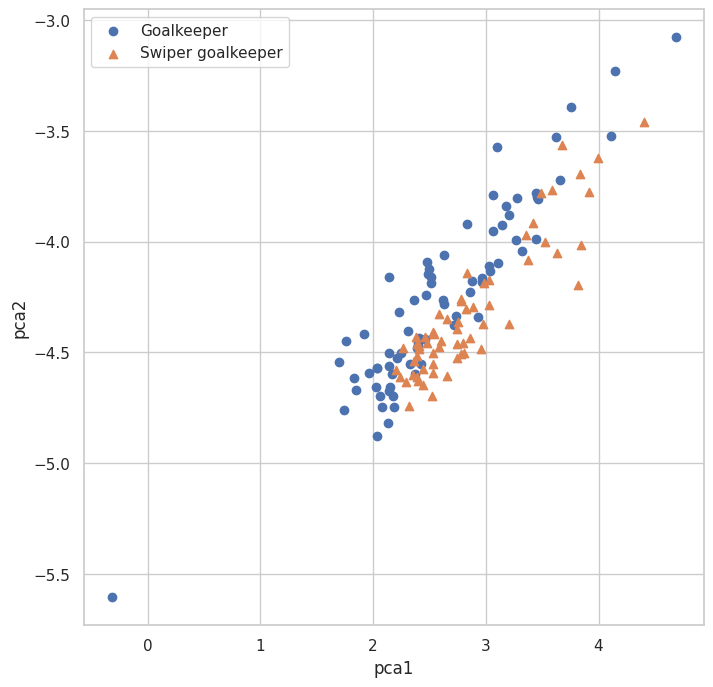

In [ ]:
markers = ['o', '^']

plt.figure(figsize=(8, 8))

for i, marker in enumerate(markers):
    x_axis_data = result1df[result1df['target_encoded']==i]['pca1']
    y_axis_data = result1df[result1df['target_encoded']==i]['pca2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=result1df['target'][result1df['target_encoded']==i].iloc[0])

plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [ ]:
result0df['Position'] = result['Position']
result2df = result0df[result0df['Position']=='DF']
result2df

,pca1,pca2,target,target_encoded,Position
5,0.862732,1.329457,Safety,13,DF
6,3.110601,0.816691,Progressor,10,DF
7,3.489870,-0.814368,Spreader,14,DF
9,-0.882941,1.157874,Safety,13,DF
13,3.142432,-0.740545,SCB,12,DF
...,...,...,...,...,...
1690,0.638617,3.403789,Progressor,10,DF
1693,2.720064,-1.512440,SCB,12,DF
1696,0.925898,3.773228,Progressor,10,DF
1698,2.719847,-0.412393,SCB,12,DF


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# target 컬럼 라벨인코딩
result2df['target_encoded'] = encoder.fit_transform(result2df['target'])
result2df

<ipython-input-115-3c8501b0588b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result2df['target_encoded'] = encoder.fit_transform(result2df['target'])


,pca1,pca2,target,target_encoded,Position
5,0.862732,1.329457,Safety,4,DF
6,3.110601,0.816691,Progressor,2,DF
7,3.489870,-0.814368,Spreader,5,DF
9,-0.882941,1.157874,Safety,4,DF
13,3.142432,-0.740545,SCB,3,DF
...,...,...,...,...,...
1690,0.638617,3.403789,Progressor,2,DF
1693,2.720064,-1.512440,SCB,3,DF
1696,0.925898,3.773228,Progressor,2,DF
1698,2.719847,-0.412393,SCB,3,DF


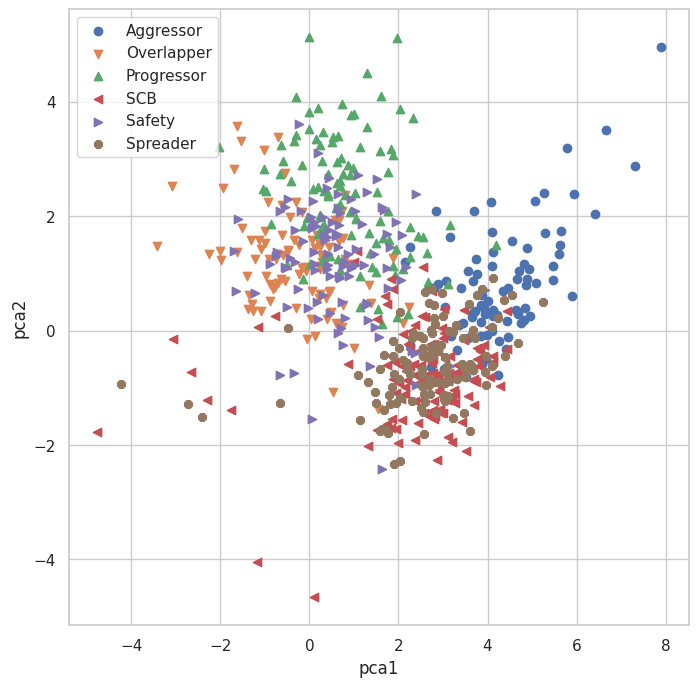

In [ ]:
markers = ['o', 'v', '^', '<', '>', '8']

plt.figure(figsize=(8, 8))

for i, marker in enumerate(markers):
    x_axis_data = result2df[result2df['target_encoded']==i]['pca1']
    y_axis_data = result2df[result2df['target_encoded']==i]['pca2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=result2df['target'][result2df['target_encoded']==i].iloc[0])

plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [ ]:
result0df['Position'] = result['Position']
result3df = result0df[result0df['Position']=='MF']
result3df

,pca1,pca2,target,target_encoded,Position
1,-0.641232,-0.615604,Box crasher,1,MF
3,1.731151,0.127289,Box crasher,1,MF
4,0.261973,1.843589,Box to Box,2,MF
10,1.598551,0.773329,Box crasher,1,MF
11,2.811503,-1.167928,Box crasher,1,MF
...,...,...,...,...,...
1684,1.837715,2.787960,Creator,4,MF
1687,1.223508,1.225079,Creator,4,MF
1688,1.134912,0.403468,Box crasher,1,MF
1692,0.074592,1.050746,Box crasher,1,MF


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# target 컬럼 라벨인코딩
result3df['target_encoded'] = encoder.fit_transform(result3df['target'])
result3df

<ipython-input-118-97fd95103e74>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3df['target_encoded'] = encoder.fit_transform(result3df['target'])


,pca1,pca2,target,target_encoded,Position
1,-0.641232,-0.615604,Box crasher,0,MF
3,1.731151,0.127289,Box crasher,0,MF
4,0.261973,1.843589,Box to Box,1,MF
10,1.598551,0.773329,Box crasher,0,MF
11,2.811503,-1.167928,Box crasher,0,MF
...,...,...,...,...,...
1684,1.837715,2.787960,Creator,3,MF
1687,1.223508,1.225079,Creator,3,MF
1688,1.134912,0.403468,Box crasher,0,MF
1692,0.074592,1.050746,Box crasher,0,MF


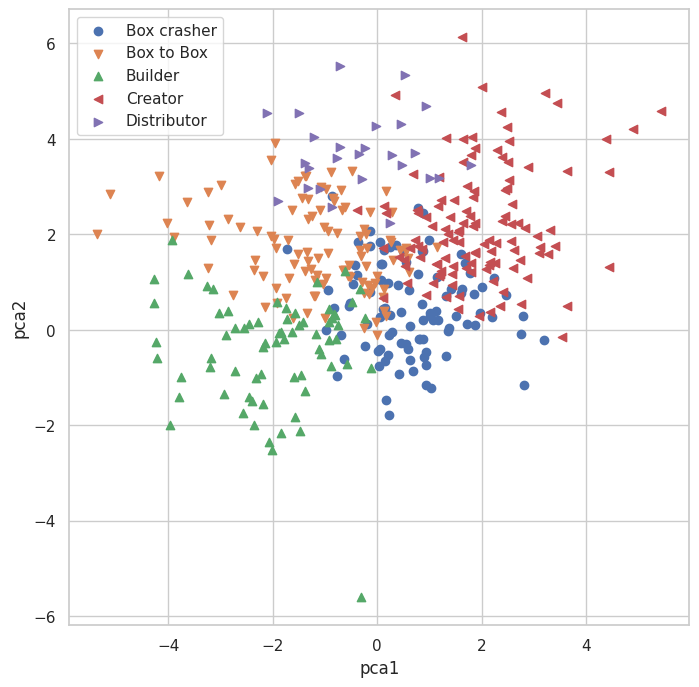

In [ ]:
markers = ['o', 'v', '^', '<', '>']

plt.figure(figsize=(8, 8))

for i, marker in enumerate(markers):
    x_axis_data = result3df[result3df['target_encoded']==i]['pca1']
    y_axis_data = result3df[result3df['target_encoded']==i]['pca2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=result3df['target'][result3df['target_encoded']==i].iloc[0])

plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [ ]:
result0df['Position'] = result['Position']
result4df = result0df[result0df['Position']=='FW']
result4df

,pca1,pca2,target,target_encoded,Position
0,-4.452488,-0.888666,Wide Threat,18,FW
2,-3.925198,1.020945,Wide Threat,18,FW
8,-2.149602,-1.944163,Roamer,11,FW
12,-3.976099,-0.531242,Roamer,11,FW
16,-3.114074,-2.347751,Finisher,6,FW
...,...,...,...,...,...
1685,-4.391454,-0.770482,Roamer,11,FW
1691,-1.251785,-1.578663,Roamer,11,FW
1694,-2.962885,2.014974,Unlocker,17,FW
1695,-4.126258,0.156660,Outlet,8,FW


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# target 컬럼 라벨인코딩
result4df['target_encoded'] = encoder.fit_transform(result4df['target'])
result4df

<ipython-input-121-2cb924d23d0a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result4df['target_encoded'] = encoder.fit_transform(result4df['target'])


,pca1,pca2,target,target_encoded,Position
0,-4.452488,-0.888666,Wide Threat,5,FW
2,-3.925198,1.020945,Wide Threat,5,FW
8,-2.149602,-1.944163,Roamer,2,FW
12,-3.976099,-0.531242,Roamer,2,FW
16,-3.114074,-2.347751,Finisher,0,FW
...,...,...,...,...,...
1685,-4.391454,-0.770482,Roamer,2,FW
1691,-1.251785,-1.578663,Roamer,2,FW
1694,-2.962885,2.014974,Unlocker,4,FW
1695,-4.126258,0.156660,Outlet,1,FW


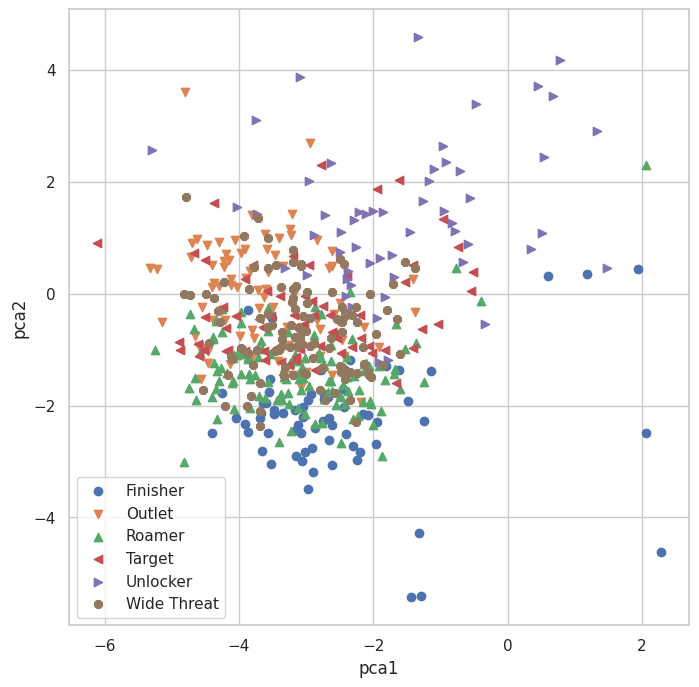

In [ ]:
markers = ['o', 'v', '^', '<', '>', '8']

plt.figure(figsize=(8, 8))

for i, marker in enumerate(markers):
    x_axis_data = result4df[result4df['target_encoded']==i]['pca1']
    y_axis_data = result4df[result4df['target_encoded']==i]['pca2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=result4df['target'][result4df['target_encoded']==i].iloc[0])

plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()